## Necessary Imports

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split, GridSearchCV

## Loading the Dataset

In [ ]:
engine_df = pd.read_csv("/content/synthetic_dataset.csv")
engine_df.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition Crankshaft Vibration  \
0     84.144163     81.632187                 1                   No   
1     77.640934     82.445724                 0                  Low   
2     77.752266     79.645777                 1                   No   
3     74.129907     71.774629                 1                   No   
4     78.396989     87.000225                 0                   No   

   Engine Temperature  Oil Level  Oil Leakage  
0           84.276380  11.624679            1  
1           84.501212  19.100910            0  
2           80.888061   7.383303            0  
3           74.802439  21.393707            0  
4           88.878805  15.398500            0

## Exploratory Data Analysis

In [ ]:
engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Engine rpm            19535 non-null  int64  
 1   Lub oil pressure      19535 non-null  float64
 2   Fuel pressure         19535 non-null  float64
 3   Coolant pressure      19535 non-null  float64
 4   lub oil temp          19535 non-null  float64
 5   Coolant temp          19535 non-null  float64
 6   Engine Condition      19535 non-null  int64  
 7   Crankshaft Vibration  19535 non-null  object 
 8   Engine Temperature    19535 non-null  float64
 9   Oil Level             19535 non-null  float64
 10  Oil Leakage           19535 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 1.6+ MB


In [ ]:
engine_df.describe()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  Engine Temperature  \
count  19535.000000  19535.000000      19535.000000        19535.000000   
mean      77.643420     78.427433          0.630509           80.427807   
std        3.110984      6.206749          0.482679            6.229602   
min       71.321974     61.673325          0.000000           63.867986   
25%       75.725990     73.895421          0.000000           75.880935   
50%       76.817350     78.346662          1.000000           80.326231   
75%       78.071691     82.915411          1.000000           84.904879   
max       89.580796    195.527912          1.000000          197.117027   

          Oil Level   Oil Leakage  
count  19535.000000  19535.000000  
mean       6.645053      0.255439  
std        2.872357      0.436119  
min        0.002701      0.000000  
25%        4.794665      0.000000  
50%        6.164021      0.000000  
75%        7.825184      1.000000  
max       22.985300      1.000000

In [ ]:
engine_df["Engine Condition"].value_counts()

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

**`Important`**
- There is binary encoding to the target variable
- `0`: Bad Condition
- `1`: Good Condition

**`Seperating the Features and Targets`**

In [ ]:
engine_features = engine_df.drop("Engine Condition", axis=1)
engine_labels = engine_df["Engine Condition"]

**`Visualising the Distribution of all the Attributes`**

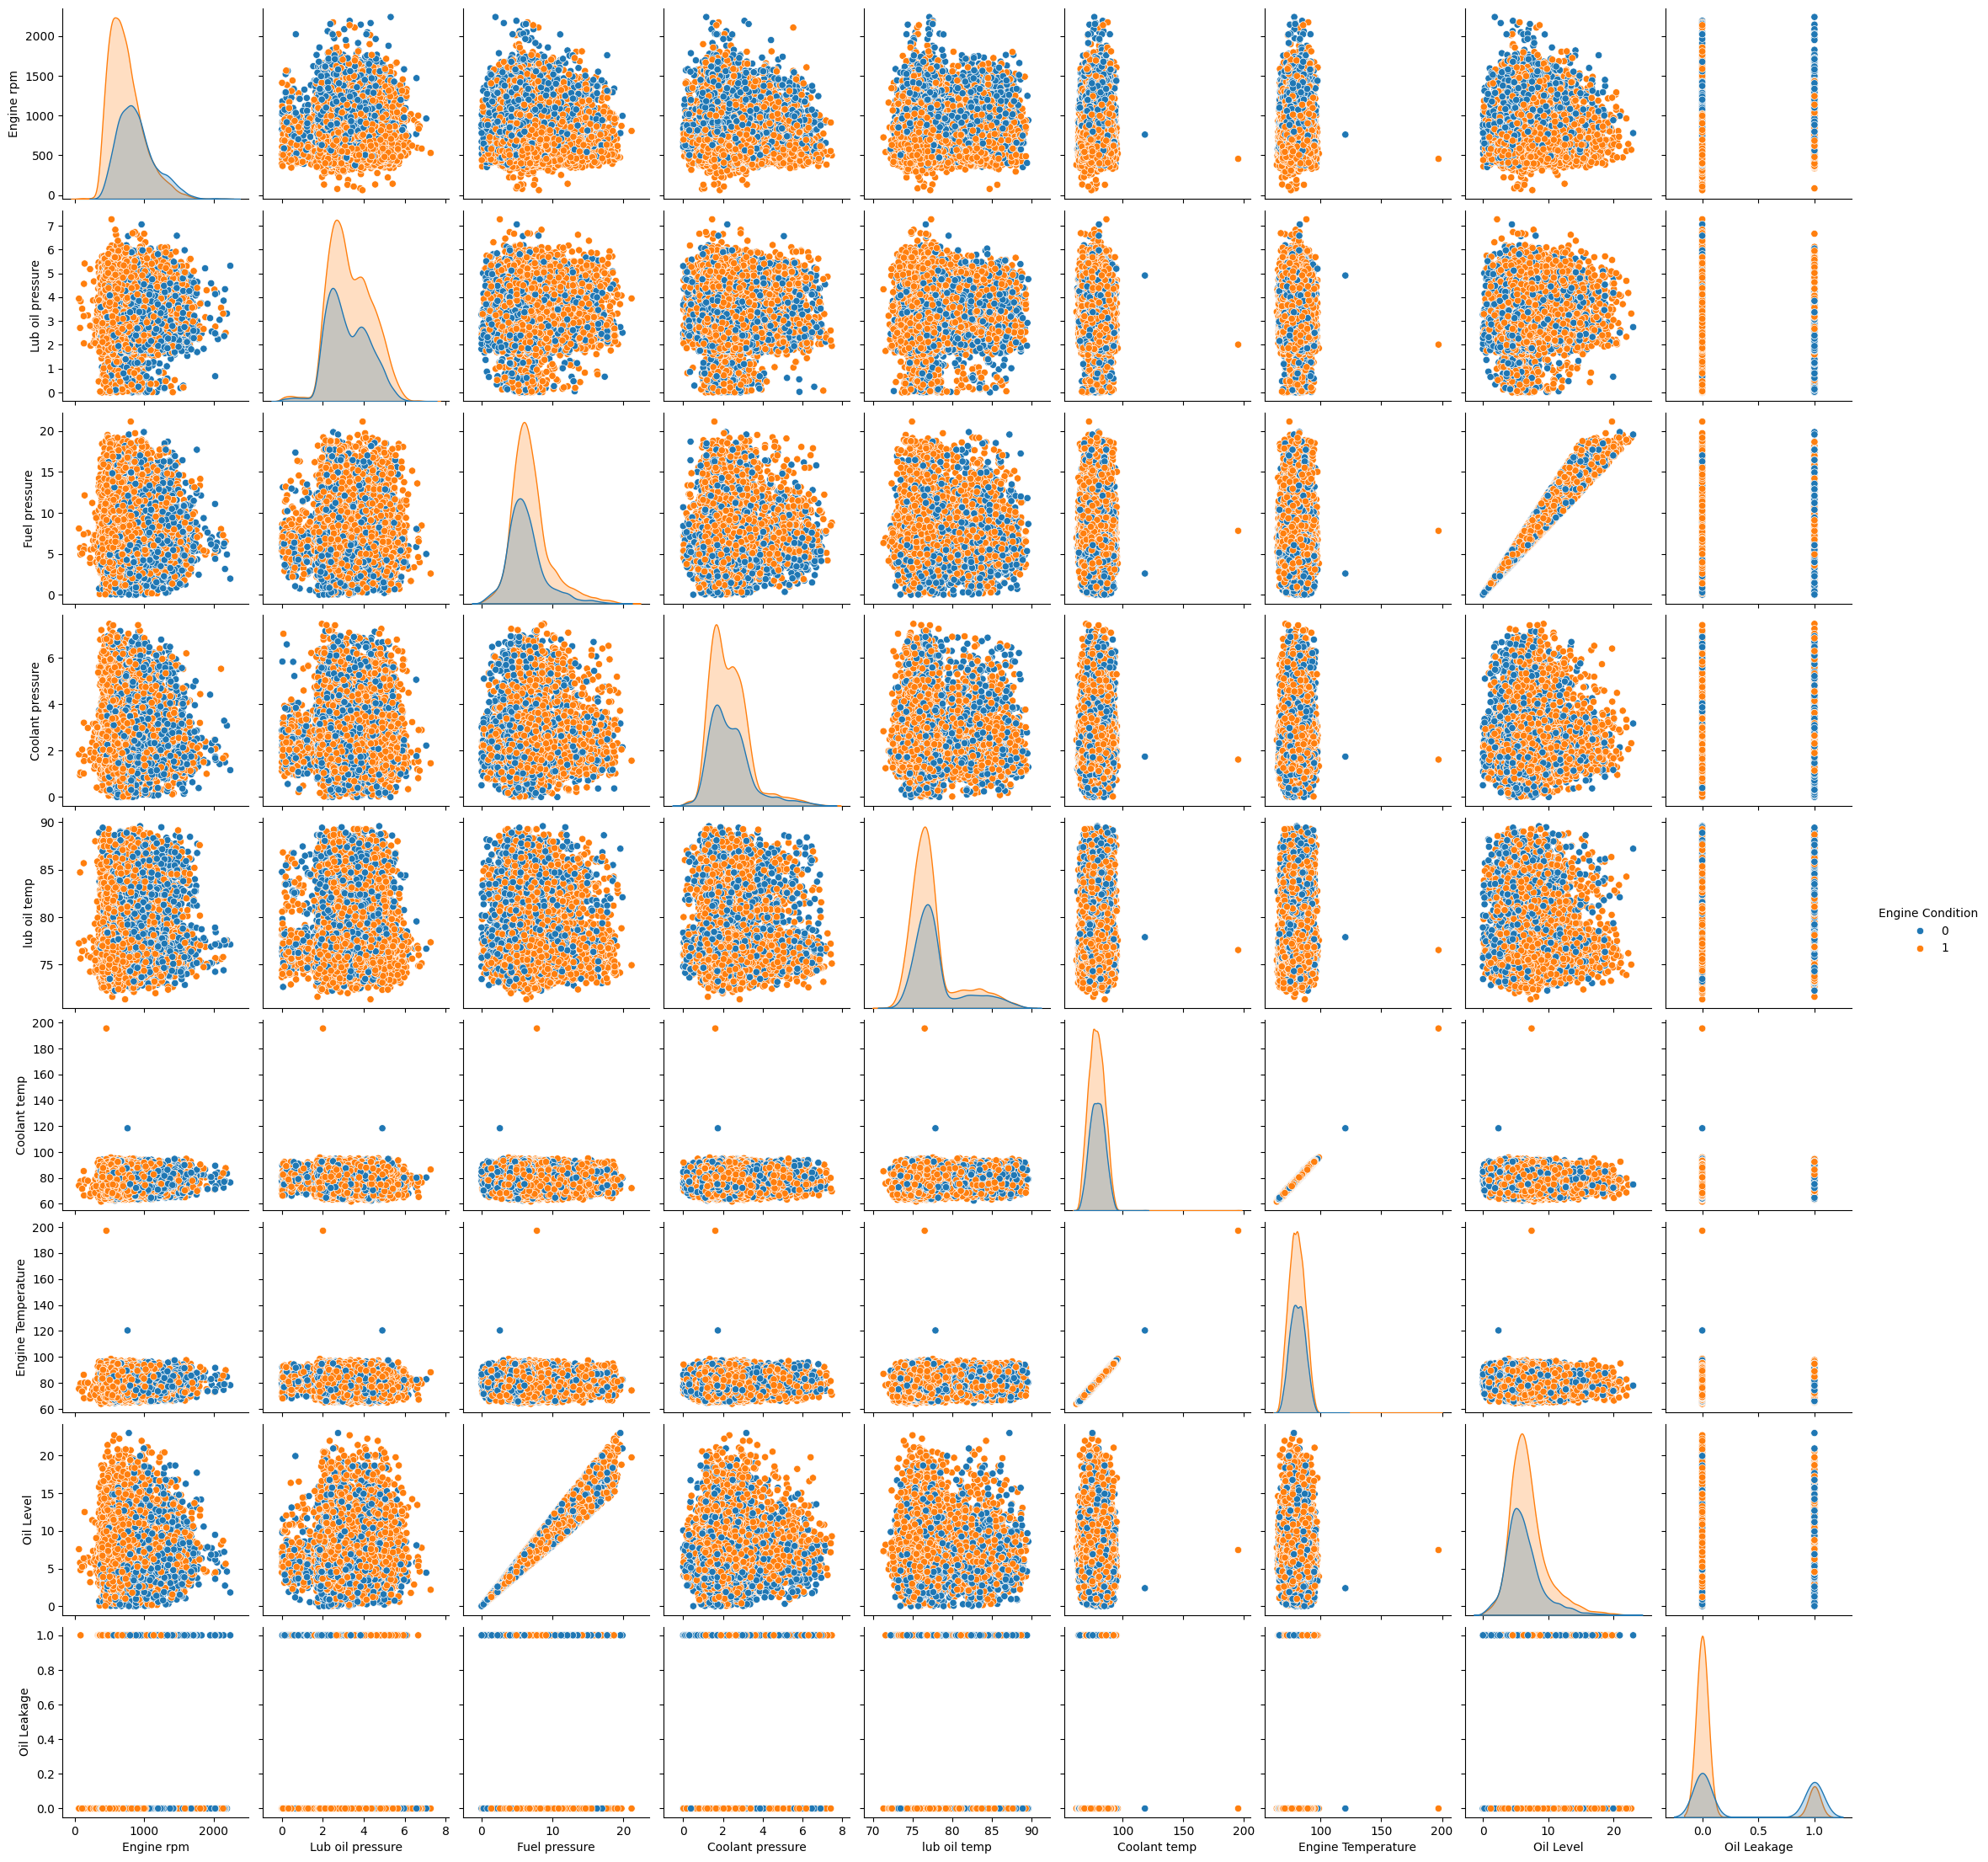

In [ ]:

sns.pairplot(engine_df, hue="Engine Condition")

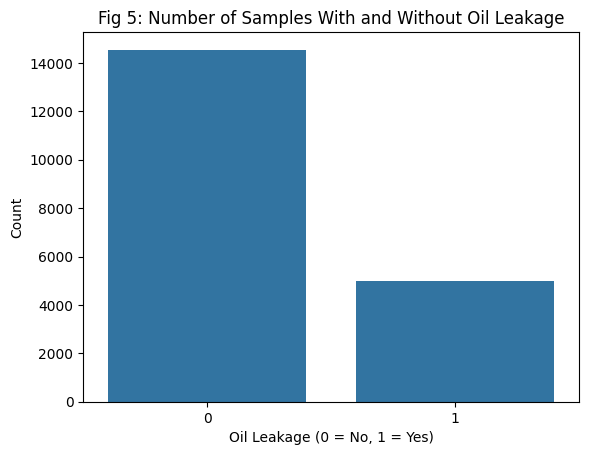

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Oil Leakage', data=engine_df)
plt.title('Fig 5: Number of Samples With and Without Oil Leakage')
plt.xlabel('Oil Leakage (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Prepare feature matrix X from engine_df
features = ['Engine rpm', 'Lub oil pressure', 'Coolant pressure',
            'lub oil temp', 'Coolant temp', 'Oil Level']
X = engine_df[features]


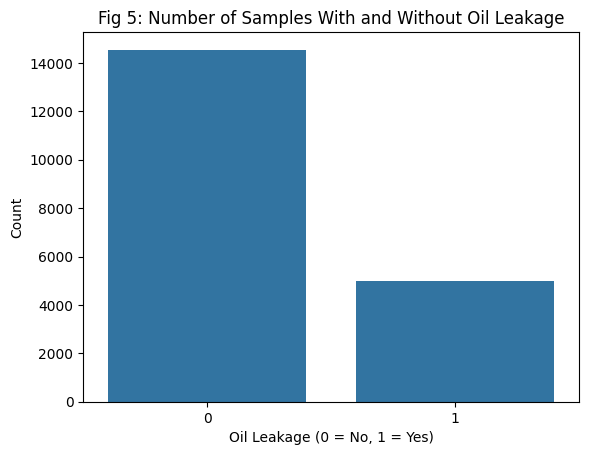

In [ ]:
# Fig 5: Bar Graph of Oil Leakage Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Oil Leakage', data=engine_df)
plt.title('Fig 5: Number of Samples With and Without Oil Leakage')
plt.xlabel('Oil Leakage (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


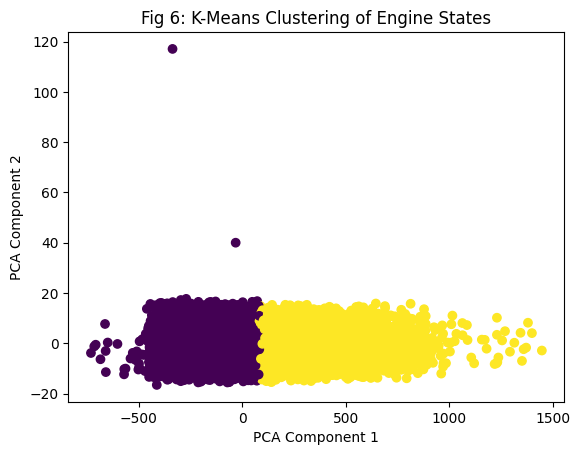

In [ ]:
# Fig 6: K-Means Clustering of Engine States
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='viridis')
plt.title('Fig 6: K-Means Clustering of Engine States')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


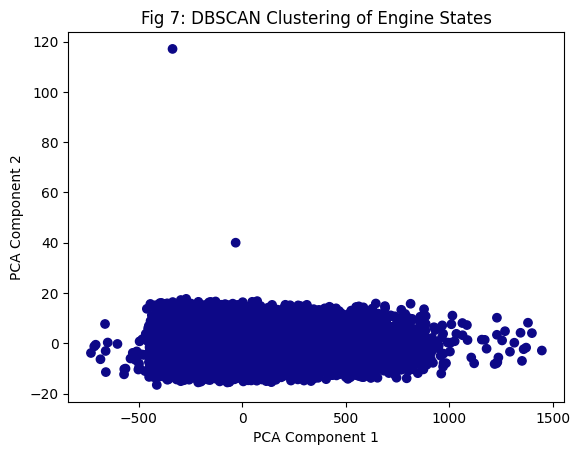

In [ ]:
# Fig 7: DBSCAN Clustering of Engine States
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='plasma')
plt.title('Fig 7: DBSCAN Clustering of Engine States')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


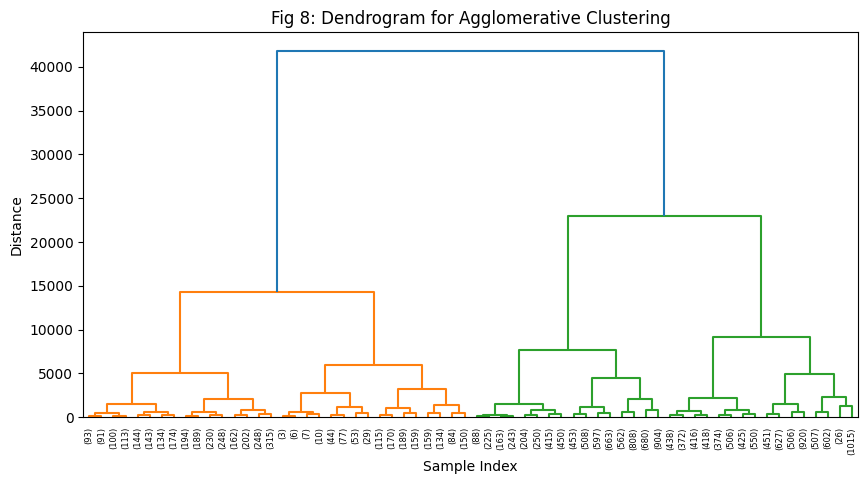

In [ ]:
# Fig 8: Dendrogram for Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Fig 8: Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


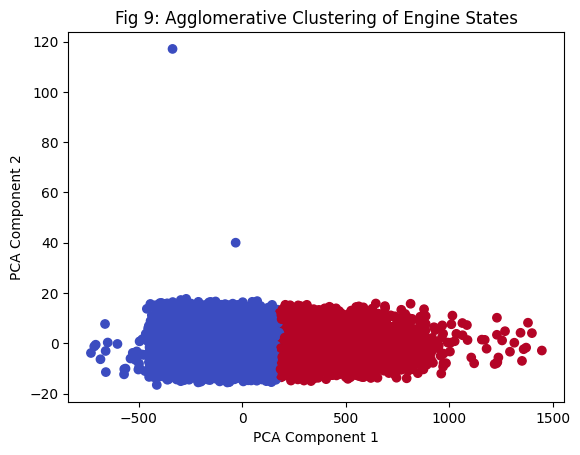

In [ ]:
# Fig 9: Agglomerative Clustering of Engine States
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X)

plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='coolwarm')
plt.title('Fig 9: Agglomerative Clustering of Engine States')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


**`Inference`**
- Most of the attributes provided by the dataset are well distributed with respect to all the columns
- `Coolant Temp` needs to be scaled to make its distribution more uniform

In [ ]:
# Convert Crankshaft Vibration from categorical to numerical
vibration_mapping = {'No': 0, 'Low': 1, 'Medium': 2}
engine_df['Crankshaft Vibration'] = engine_df['Crankshaft Vibration'].map(vibration_mapping)


In [ ]:
engine_df['Crankshaft Vibration'].value_counts()


Crankshaft Vibration
0    11345
1     7865
2      325
Name: count, dtype: int64

**`Calculating the Correlation Coefficient`**

In [ ]:
corr_matrix = engine_df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition        1.000000
Fuel pressure           0.116259
Oil Level               0.112303
Lub oil pressure        0.060904
Coolant pressure       -0.024054
Engine Temperature     -0.046153
Coolant temp           -0.046326
lub oil temp           -0.093635
Crankshaft Vibration   -0.240832
Engine rpm             -0.268201
Oil Leakage            -0.329338
Name: Engine Condition, dtype: float64

**`Inference`**
- `Engine Condition` has the highest **positive** correlation with `Fuel Pressure`
- `Engine Condition` has the highest **negative** correlation with `Engine RPM`

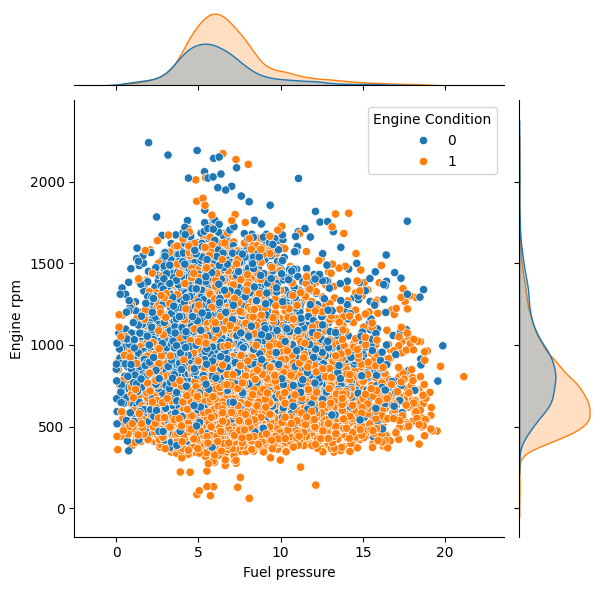

In [ ]:
sns.jointplot(engine_df, x="Fuel pressure", y="Engine rpm", hue="Engine Condition")

**`Verification - 1`**
- We can verify that for higher/consistent values of `Fuel Pressure` and low values of `Engine rpm` the `Engine Condition` is positive

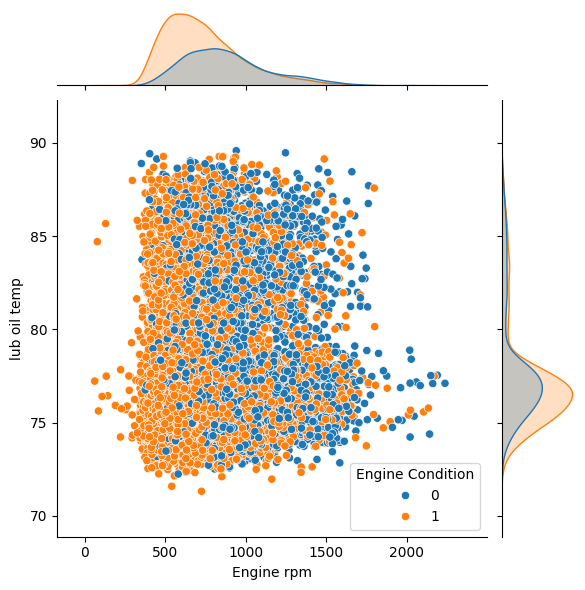

In [ ]:
sns.jointplot(engine_df, x="Engine rpm", y="lub oil temp", hue="Engine Condition")

**`Important`**
- Most of the the `Orange` datapoints indicating a Positive `Engine Condition` are on the left side

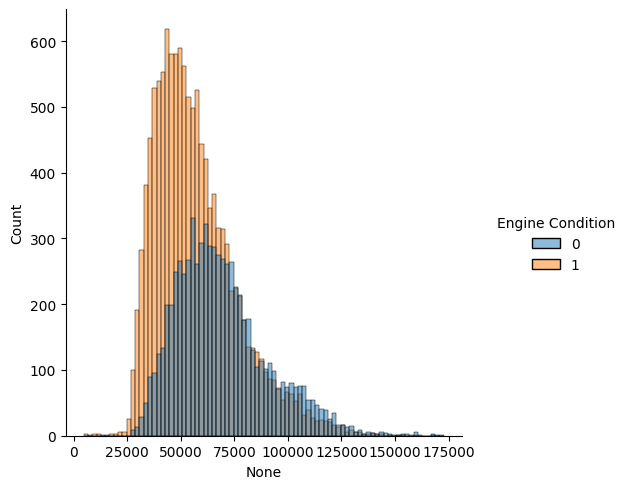

In [ ]:
sns.displot(engine_df, x=engine_df["Engine rpm"] * engine_df["lub oil temp"], hue="Engine Condition")

**`Verification - 2`**
- We can verify that for lower/consistent values of `Engine RPM` and `Lub oil temp` the `Engine Condition` is positive

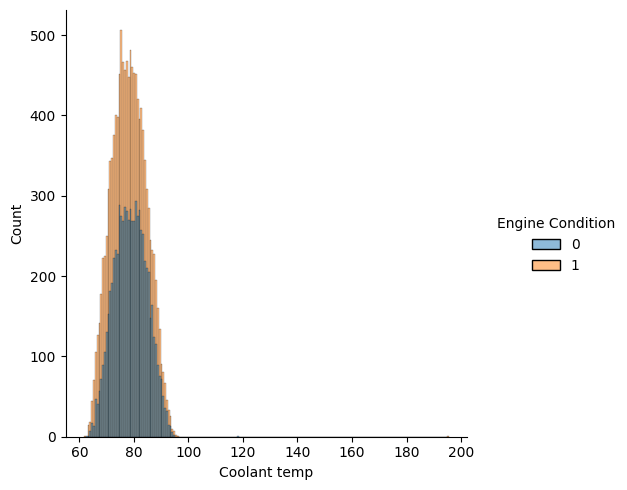

In [ ]:
sns.displot(engine_df, x="Coolant temp", hue="Engine Condition")

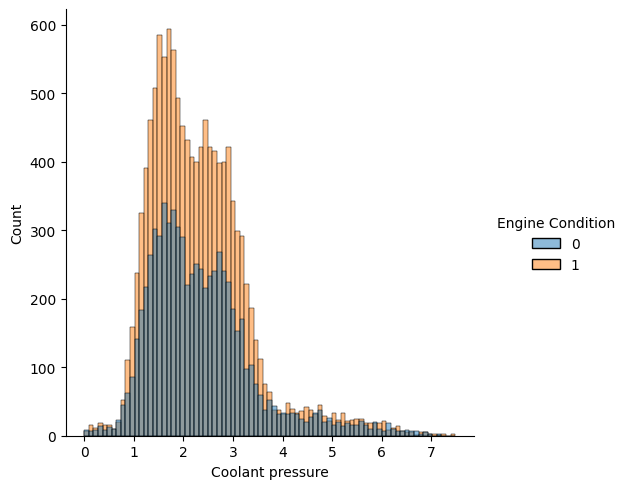

In [ ]:
sns.displot(engine_df, x="Coolant pressure", hue="Engine Condition")

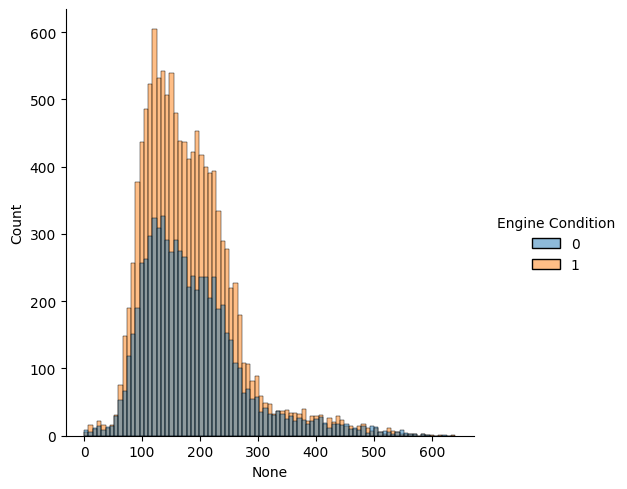

In [ ]:
sns.displot(engine_df, x=engine_df["Coolant pressure"] * engine_df["Coolant temp"], hue="Engine Condition")

**`Inference`**
- We can see that there is a uniform distribution of `Positive and Negative` Engine conditions for diifferent values of `Coolant Pressure` and `Coolant Temperature`

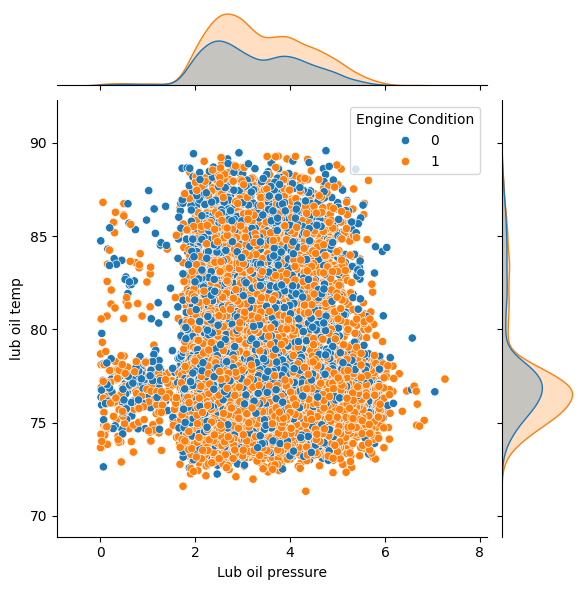

In [ ]:
sns.jointplot(engine_df, x="Lub oil pressure", y="lub oil temp", hue="Engine Condition")

**`Inference`**
- As seen in the KDE
    - `Lub Oil Pressure` has a `direct relationship` with `Engine Condition`
    - `Lub Oil Temperature` has an `inverse relationship` with `Engine Condition`

## Trying New Attributes (Feature Engineering)

In [ ]:
# Oiling system
# engine_df["Oil System"] = engine_df["Lub oil pressure"] * engine_df["lub oil temp"]

# Coolant System
# engine_df["Coolant System"] = engine_df["Coolant pressure"] * engine_df["Coolant temp"]

# Coolant Efficiency
engine_df["Coolant Efficiency"] = (1 / engine_df["Engine rpm"]) * engine_df["Coolant temp"]

# Oil Efficiency
engine_df["Oil Efficiency"] = 1 / (engine_df["Engine rpm"] * engine_df["lub oil temp"])

engine_df.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition Crankshaft Vibration  \
0     84.144163     81.632187                 1                   No   
1     77.640934     82.445724                 0                  Low   
2     77.752266     79.645777                 1                   No   
3     74.129907     71.774629                 1                   No   
4     78.396989     87.000225                 0                   No   

   Engine Temperature  Oil Level  Oil Leakage  Coolant Efficiency  \
0           84.276380  11.624679            1            0.116617   
1           84.501212  19.100910            0            0.094116   
2           80.888061   7.383303            0            0.153165   
3           74.802439  21.393707            0            0.151743   
4           88.878805  15.398500            0            0.140550   

   Oil Efficiency  
0        0.000017  
1        0.000015  
2        0.000025  
3        0.000029  
4        0.000021

**`Calculating the Correlations with the New Attributes`**

In [ ]:
corr_matrix = engine_df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition        1.000000
Oil Efficiency          0.274301
Coolant Efficiency      0.252389
Fuel pressure           0.116259
Oil Level               0.112303
Lub oil pressure        0.060904
Coolant pressure       -0.024054
Engine Temperature     -0.046153
Coolant temp           -0.046326
lub oil temp           -0.093635
Crankshaft Vibration   -0.240832
Engine rpm             -0.268201
Oil Leakage            -0.329338
Name: Engine Condition, dtype: float64

**`Inference`**
- `Oil Efficiency` and `Coolant Efficiency` have high positive correlation to a `Positive Engine Condition`

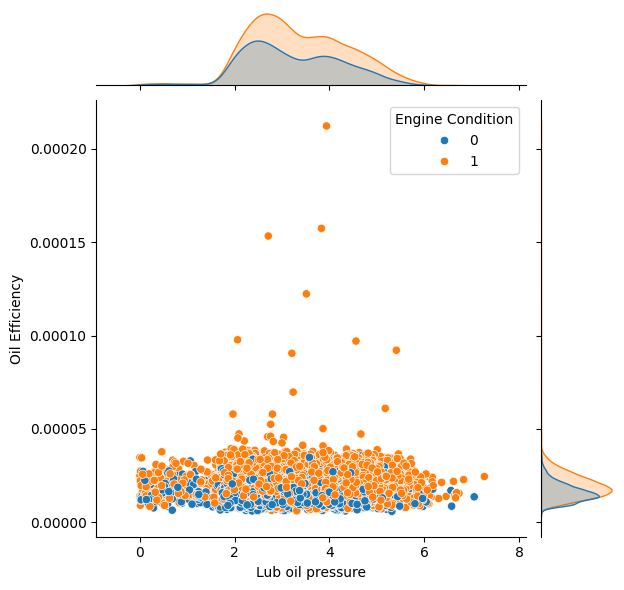

In [ ]:
sns.jointplot(engine_df, x="Lub oil pressure", y="Oil Efficiency", hue="Engine Condition")

**`Inference`**
- As the Oil Efficiency increases the Engine Condition is mostly positive
- The Lub Oil Pressure has a mostly uniform distribution over the entire range of values

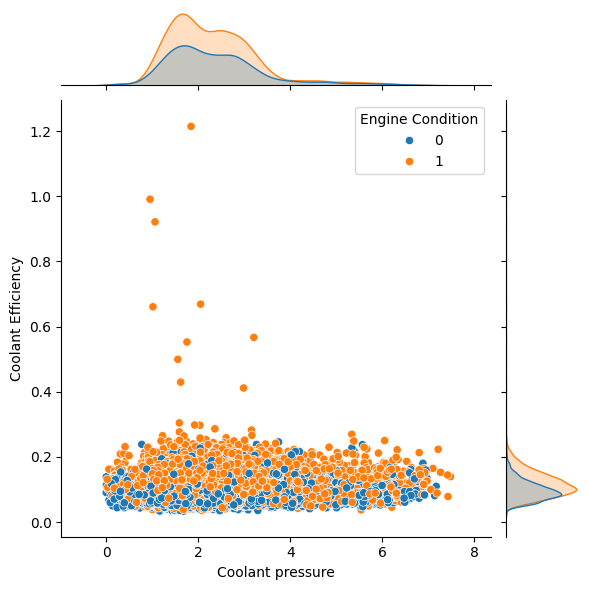

In [ ]:
sns.jointplot(engine_df, x="Coolant pressure", y="Coolant Efficiency", hue="Engine Condition")

**`Inference`**
- As the Coolant Efficiency increases the Engine Condition is mostly positive
- The Coolant Pressure has a mostly uniform distribution over the entire range of values

## Data Preprocessing

In [ ]:
# Normalize casing and map strings to integers
engine_features['Crankshaft Vibration'] = (
    engine_features['Crankshaft Vibration']
                       # remove leading/trailing spaces
                     # convert to lowercase
    .map({'No': 0, 'Low': 1, 'Medium': 2})
)


In [ ]:
engine_features['Crankshaft Vibration'].unique()


array([0, 1, 2])

**`Building a Custom Transformer to add the new attibutes`**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Column indices based on your DataFrame:
        # Lub oil pressure: 1, lub oil temp: 4
        # Coolant pressure: 3, Coolant temp: 5

        oil_efficiency = X[:, 1] / X[:, 4]
        coolant_efficiency = X[:, 3] / X[:, 5]

        # Stack the new features onto the original data
        return np.c_[X, oil_efficiency, coolant_efficiency]


In [ ]:
engine_features.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Crankshaft Vibration  Engine Temperature  \
0     84.144163     81.632187                     0           84.276380   
1     77.640934     82.445724                     1           84.501212   
2     77.752266     79.645777                     0           80.888061   
3     74.129907     71.774629                     0           74.802439   
4     78.396989     87.000225                     0           88.878805   

   Oil Level  Oil Leakage  
0  11.624679            1  
1  19.100910            0  
2   7.383303            0  
3  21.393707            0  
4  15.398500            0

In [ ]:
attr_addr = AttributesAdder()
engine_prep = attr_addr.transform(engine_features.values)
print(f"Transformed Data: {engine_prep[0, :]}")

Transformed Data: [7.00000000e+02 2.49359182e+00 1.17909274e+01 3.17898079e+00
 8.41441629e+01 8.16321865e+01 0.00000000e+00 8.42763797e+01
 1.16246786e+01 1.00000000e+00 2.96347570e-02 3.89427373e-02]


**`Building the Pipeline to Automate Data Preprocessing`**

In [ ]:
engine_prep_pipe = Pipeline([
    ("attr_adder", AttributesAdder()),
    ("std_scaler", StandardScaler())
])

engine_data_prepared = engine_prep_pipe.fit_transform(engine_features.values)
engine_data_prepared[0, :]

array([-0.34094836, -0.7930403 ,  1.85998007,  0.81401782,  2.08966341,
        0.51634686, -0.8249782 ,  0.61780379,  1.73368185,  1.70728722,
       -0.97581762,  0.67067537])

In [ ]:
engine_data_prepared.shape

(19535, 10)

In [ ]:
attr_adder = AttributesAdder()
engine_data_prepared = attr_adder.transform(engine_features.values)
print(engine_data_prepared.shape)
print(engine_data_prepared[0])


(19535, 12)
[7.00000000e+02 2.49359182e+00 1.17909274e+01 3.17898079e+00
 8.41441629e+01 8.16321865e+01 0.00000000e+00 8.42763797e+01
 1.16246786e+01 1.00000000e+00 2.96347570e-02 3.89427373e-02]


**`Splitting the Prepared Dataset`**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(engine_data_prepared, engine_labels, test_size=0.1, random_state=42)
print(f"Shape X Train: {X_train.shape}")
print(f"Shape y Train: {y_train.shape}\n")
print(f"Shape X Test: {X_test.shape}")
print(f"Shape y Test: {y_test.shape}\n")

Shape X Train: (17581, 12)
Shape y Train: (17581,)

Shape X Test: (1954, 12)
Shape y Test: (1954,)



## Applying Machine Learning Models

**`Applying Logistic Regression`**

In [ ]:
# Initilisation
log_reg = LogisticRegression()

# Training
log_reg.fit(X_train, y_train)

validation = log_reg.predict(X_test)
score = sum(validation == y_test)
print(f"Score: {score / len(y_test)}")

Score: 0.7041965199590583


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**`Applying Decision Tree Classification`**

In [ ]:
# Initilisation
tree_cls = DecisionTreeClassifier()

# Training
tree_cls.fit(X_train, y_train)

validation = tree_cls.predict(X_test)
score = sum(validation == y_test)
print(f"Score: {score / len(y_test)}")

Score: 0.638689866939611


**`Applying Random Forest Classification`**

In [ ]:
# Initilisation
forest_cls = RandomForestClassifier()

# Training
forest_cls.fit(X_train, y_train)

validation = forest_cls.predict(X_test)
score = sum(validation == y_test)
print(f"Score: {score / len(y_test)}")

Score: 0.7134083930399181


## Model Fine Tuning

In [ ]:
# Print all column names used in training
print(engine_features.columns.tolist())


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'X_test' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    engine_data_prepared, engine_labels, test_size=0.2, random_state=42, stratify=engine_labels
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Model definition
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Model training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6695 - loss: 0.6165 - val_accuracy: 0.7323 - val_loss: 0.5366 - learning_rate: 0.0010
Epoch 2/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7064 - loss: 0.5670 - val_accuracy: 0.7353 - val_loss: 0.5325 - learning_rate: 0.0010
Epoch 3/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7162 - loss: 0.5552 - val_accuracy: 0.7402 - val_loss: 0.5283 - learning_rate: 0.0010
Epoch 4/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7212 - loss: 0.5528 - val_accuracy: 0.7387 - val_loss: 0.5261 - learning_rate: 0.0010
Epoch 5/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7290 - loss: 0.5486 - val_accuracy: 0.7420 - val_loss: 0.5267 - learning_rate: 0.0010
Epoch 6/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7247 - loss: 0.5480 - val_accuracy: 0.7412 - val_loss: 0.5262 - learning_rate: 0.0010
Epoch 7/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7295 - loss: 0.5439 - val_a

Text(0.5, 1.0, 'Loss')

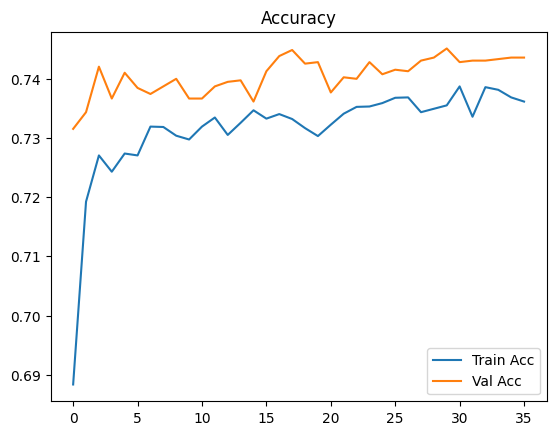

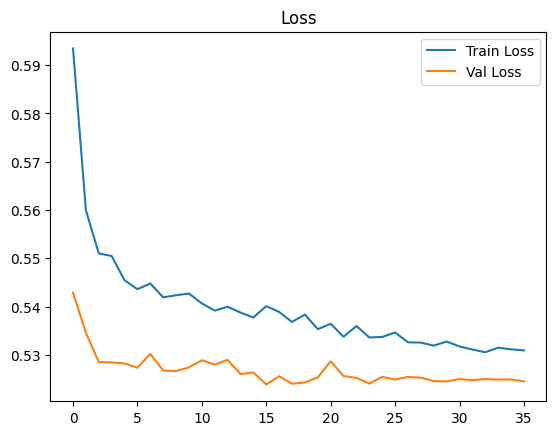

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')


In [ ]:
# Fig 12: Confusion Matrix for Oil Leakage Detection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Fig 12: Confusion Matrix for Oil Leakage Detection')
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


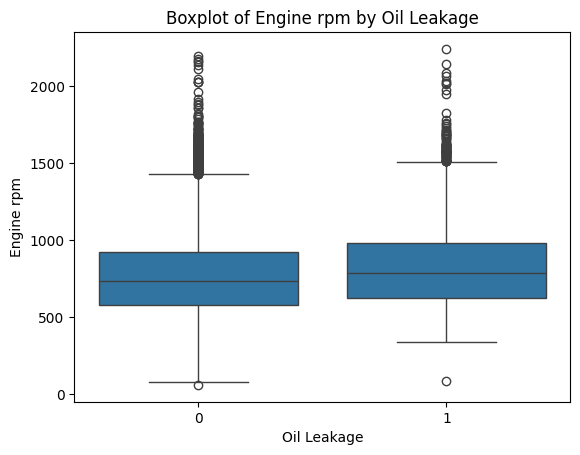

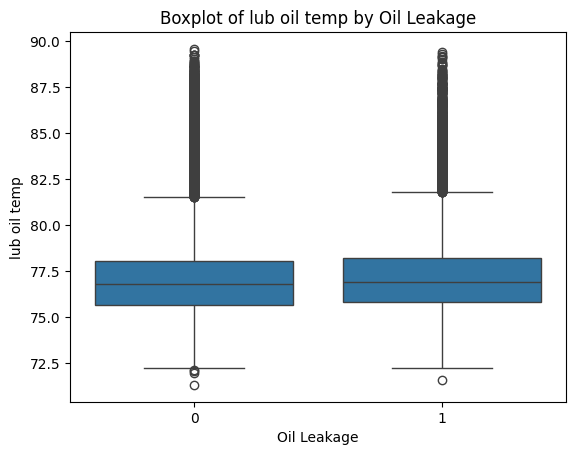

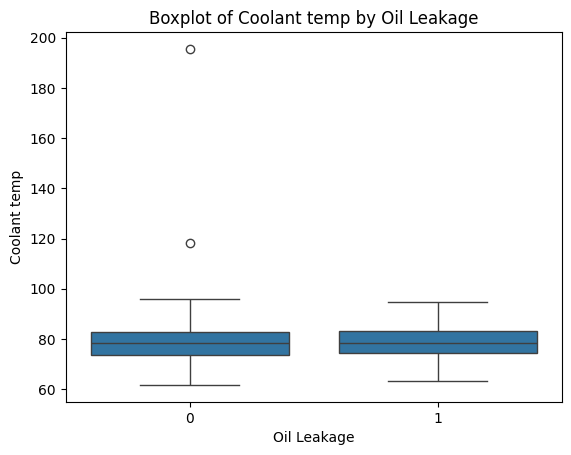

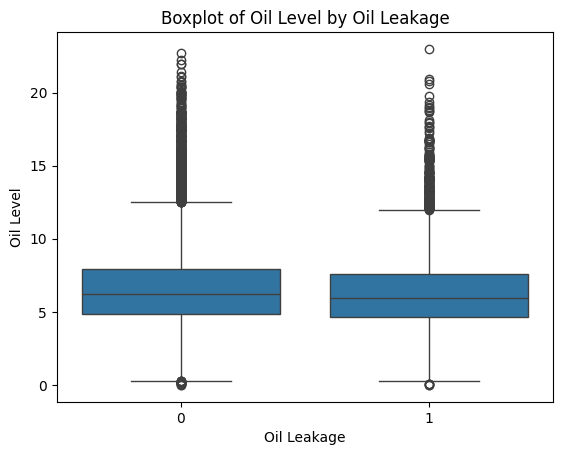

In [ ]:
import seaborn as sns
for feature in features:
    plt.figure()
    sns.boxplot(x='Oil Leakage', y=feature, data=engine_df)
    plt.title(f'Boxplot of {feature} by Oil Leakage')
    plt.show()

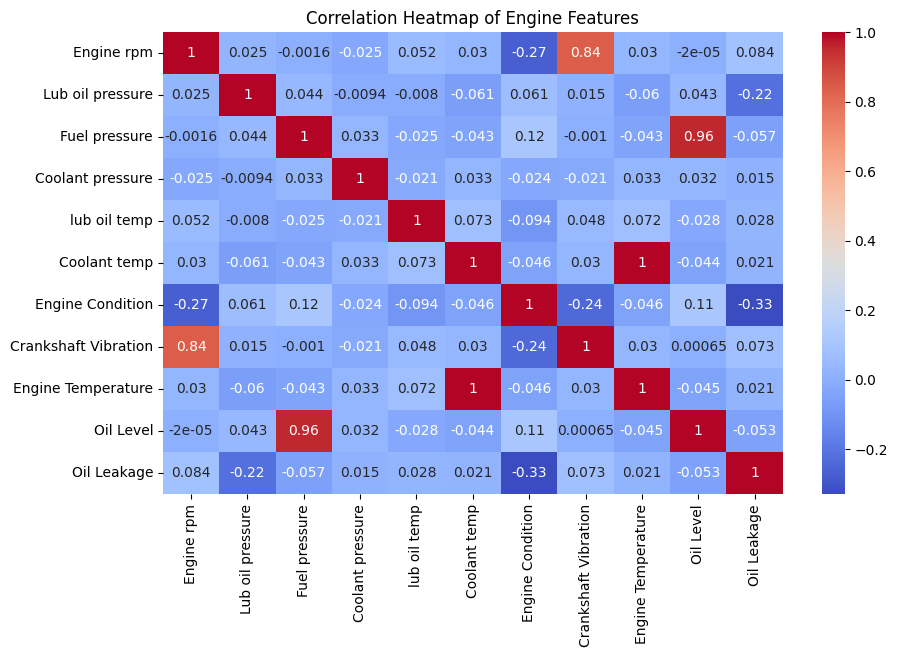

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(engine_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Engine Features')
plt.show()


In [ ]:
# Save the trained model
model.save("model.h5")  # Saves in Keras .h5 format


In [ ]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("model.h5")

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model conversion complete!")


Saved artifact at '/tmp/tmpu5opnwi4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132723719005456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719009488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719011024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719010832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719007184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719011984: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model conversion complete!


In [ ]:
# Set up the converter for quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model again
tflite_quantized_model = converter.convert()

# Save the quantized model
with open("model_quantized.tflite", "wb") as f:
    f.write(tflite_quantized_model)

print("Quantized TFLite model saved!")


Saved artifact at '/tmp/tmpgy6g9b17'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132723719005456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719009488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719011024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719010832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719007184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132723719011984: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantized TFLite model saved!


In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model_quantized.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Tensor:")
print(input_details)

print("\nOutput Tensor:")
print(output_details)


Input Tensor:
[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

Output Tensor:
[{'name': 'StatefulPartitionedCall_1:0', 'index': 10, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


# Testing the Model on sample Input Data

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="model_quantized.tflite")
interpreter.allocate_tensors()


In [ ]:
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input details (shape, data type)
print("Input Details:", input_details)
print("Output Details:", output_details)


Input Details: [{'name': 'serving_default_input_layer_1:0', 'index': 0, 'shape': array([ 1, 12], dtype=int32), 'shape_signature': array([-1, 12], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 10, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

# Static data
data = {
    'Engine rpm': [700, 876, 520, 782],
    'Lub oil pressure': [2.493591821, 2.941605932, 2.961745579, 3.1241211],
    'Fuel pressure': [11.79092738, 16.19386556, 6.553146911, 7.023231],
    'Coolant pressure': [3.178980794, 2.464503704, 1.064346764, 2.723772],
    'lub oil temp': [84.14416293, 77.64093415, 77.75226574, 89.02323],
    'Coolant temp': [81.6321865, 82.4457245, 79.64577667, 88.0934343]
}

# Actual values from your earlier message
actual_conditions = [1, 0, 1, 0]  # The true engine conditions

def process_static_data():
    # Create DataFrame
    df = pd.DataFrame(data)
    print("\nOriginal Data:")
    print(df)

    # Calculate efficiency features
    df['Oil Efficiency'] = 1 / (df['Engine rpm'] * df['lub oil temp'])
    df['Coolant Efficiency'] = (1 / df['Engine rpm']) * df['Coolant temp']

    print("\nData with Efficiency Features:")
    print(df)

    # Convert to numpy array for scaling
    features = df.values

    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    print("\nScaled Data Shape:", scaled_features.shape)

    return scaled_features

def predict_and_evaluate(scaled_data):
    try:
        # Load and use the model
        model = tf.keras.models.load_model('model.h5')

        # Get raw predictions
        predictions = model.predict(scaled_data)
        print(predictions)

        # Convert to binary predictions
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy
        accuracy = accuracy_score(actual_conditions, binary_predictions)

        # Get detailed classification report
        report = classification_report(actual_conditions, binary_predictions)

        # Display results
        print("\nPredictions and Actual Values:")
        for i, (pred, actual) in enumerate(zip(binary_predictions, actual_conditions)):
            condition_pred = "Good" if pred[0] == 1 else "Bad"
            condition_actual = "Good" if actual == 1 else "Bad"
            print(f"\nEngine {i+1}:")
            print(f"Engine RPM: {data['Engine rpm'][i]}")
            print(f"Lub Oil Pressure: {data['Lub oil pressure'][i]}")
            print(f"Fuel Pressure: {data['Fuel pressure'][i]}")
            print(f"Predicted Condition: {condition_pred}")
            print(f"Actual Condition: {condition_actual}")
            print(f"Raw Prediction Score: {predictions[i][0]:.4f}")

        # Print accuracy metrics
        print("\nModel Performance:")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("\nDetailed Classification Report:")
        print(report)

    except FileNotFoundError:
        print("\nError: Model file not found. Please ensure model.h5 is in the correct location.")
    except Exception as e:
        print(f"\nError during prediction: {str(e)}")

def main():
    # Process the data and get predictions
    scaled_data = process_static_data()
    predict_and_evaluate(scaled_data)

if __name__ == "__main__":
    main()


Original Data:
   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         782          3.124121       7.023231          2.723772   

   lub oil temp  Coolant temp  
0     84.144163     81.632187  
1     77.640934     82.445724  
2     77.752266     79.645777  
3     89.023230     88.093434  

Data with Efficiency Features:
   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         782          3.124121       7.023231          2.723772   

   lub oil temp  Coolant temp  Oil Efficiency  Coolant Efficiency  
0     84.144163     81.632187        0.000

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

# Static data
data = {
    'Engine rpm': [700, 876, 520],
    'Lub oil pressure': [2.493591821, 2.941605932, 2.961745579],
    'Fuel pressure': [11.79092738, 16.19386556, 6.553146911],
    'Coolant pressure': [3.178980794, 2.464503704, 1.064346764],
    'lub oil temp': [84.14416293, 77.64093415, 77.75226574],
    'Coolant temp': [81.6321865, 82.4457245, 79.64577667]
}

# Actual values
actual_conditions = [1, 0, 1]

def process_static_data():
    # Create DataFrame
    df = pd.DataFrame(data)
    print("\nOriginal Data:")
    print(df)

    # Calculate efficiency features
    df['Oil Efficiency'] = 1 / (df['Engine rpm'] * df['lub oil temp'])
    df['Coolant Efficiency'] = (1 / df['Engine rpm']) * df['Coolant temp']

    print("\nData with Efficiency Features:")
    print(df)

    # Convert to numpy array for scaling
    features = df.values

    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    print("\nScaled Data Shape:", scaled_features.shape)

    return scaled_features

def predict_with_tflite(scaled_data):
    try:
        # Load the TFLite model
        interpreter = tf.lite.Interpreter(model_path="model_quantized.tflite")
        interpreter.allocate_tensors()

        # Get input and output tensors
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # Check input shape and type
        input_shape = input_details[0]['shape']
        print("\nModel expects input shape:", input_shape)

        # Convert input data to float32
        input_data = scaled_data.astype(np.float32)

        # Initialize array to store predictions
        predictions = []

        # Process each sample
        for sample in input_data:
            # Reshape sample to match model input shape
            input_sample = np.expand_dims(sample, axis=0)

            # Set input tensor
            interpreter.set_tensor(input_details[0]['index'], input_sample)

            # Run inference
            interpreter.invoke()

            # Get prediction
            output = interpreter.get_tensor(output_details[0]['index'])
            predictions.append(output[0])

        # Convert predictions to numpy array
        predictions = np.array(predictions)

        # Convert to binary predictions
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy
        accuracy = accuracy_score(actual_conditions, binary_predictions)

        # Get detailed classification report
        report = classification_report(actual_conditions, binary_predictions)

        # Display results
        print("\nPredictions and Actual Values:")
        for i, (pred, actual) in enumerate(zip(binary_predictions, actual_conditions)):
            condition_pred = "Good" if pred == 1 else "Bad"
            condition_actual = "Good" if actual == 1 else "Bad"
            print(f"\nEngine {i+1}:")
            print(f"Engine RPM: {data['Engine rpm'][i]}")
            print(f"Lub Oil Pressure: {data['Lub oil pressure'][i]}")
            print(f"Fuel Pressure: {data['Fuel pressure'][i]}")
            print(f"Predicted Condition: {condition_pred}")
            print(f"Actual Condition: {condition_actual}")
            # print(f"Raw Prediction Score: {predictions[i]:.4f}")

        # Print accuracy metrics
        print("\nModel Performance:")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("\nDetailed Classification Report:")
        print(report)

    except FileNotFoundError:
        print("\nError: Model file not found. Please ensure model_quantized.tflite is in the correct location.")
    except Exception as e:
        print(f"\nError during prediction: {str(e)}")
        raise e

def main():
    # Process the data and get predictions
    scaled_data = process_static_data()
    predict_with_tflite(scaled_data)
    print("Prediction with TFLite Completed !!!")

if __name__ == "__main__":
    main()


Original Data:
   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   

   lub oil temp  Coolant temp  
0     84.144163     81.632187  
1     77.640934     82.445724  
2     77.752266     79.645777  

Data with Efficiency Features:
   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   

   lub oil temp  Coolant temp  Oil Efficiency  Coolant Efficiency  
0     84.144163     81.632187        0.000017            0.116617  
1     77.640934     82.445724        0.000015            0.094116  
2     77.752266     79.645777        0.000025            0.153165  

Scale

ValueError: Cannot set tensor: Dimension mismatch. Got 8 but expected 12 for dimension 1 of input 0.

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler

# Assuming 'engine_prep_pipe' is your pipeline with StandardScaler
scaler = engine_prep_pipe.named_steps["std_scaler"]  # Extract StandardScaler

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved successfully as scaler.pkl!")


Scaler saved successfully as scaler.pkl!


In [ ]:
import pickle

# Load the saved StandardScaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Extract the mean and scale values
mean = scaler.mean_
scale = scaler.scale_  # or scaler.var_ ** 0.5 if using variance

print("Mean values:", mean.tolist())   # Convert to list for ESP32
print("Scale values:", scale.tolist()) # Convert to list for ESP32


Mean values: [791.2392628615306, 3.3037751547801384, 6.6556154508940875, 2.3353688916173536, 77.6434200131272, 78.42743301515333, 0.43588431021243923, 80.42780671068647, 6.645052954820378, 0.2554389557205017, 0.042618899269462426, 0.02992883346842072]
Scale values: [267.6043434857485, 1.0216168500100715, 2.7609499780914586, 1.0363555762725962, 3.1109043103522898, 6.206590422246137, 0.5283585806908634, 6.229442210602281, 2.87228341409106, 0.43610766517102323, 0.013305910825379057, 0.013440040001550337]


In [ ]:
import pandas as pd
import numpy as np

# Sample Data
data = {
    "Engine rpm": [700, 876, 520, 473, 619],
    "Lub oil pressure": [2.493591821, 2.941605932, 2.961745579, 3.707834743, 5.672918584],
    "Fuel pressure": [11.79092738, 16.19386556, 6.553146911, 19.51017166, 15.73887141],
    "Coolant pressure": [3.178980794, 2.464503704, 1.064346764, 3.727455362, 2.052251454],
    "lub oil temp": [84.14416293, 77.64093415, 77.75226574, 74.12990715, 78.39698883],
    "Coolant temp": [81.6321865, 82.4457245, 79.64577667, 71.77462869, 87.00022538]
}

# Create DataFrame
engine_df = pd.DataFrame(data)

# Feature Engineering
engine_df["Coolant Efficiency"] = (1 / engine_df["Engine rpm"]) * engine_df["Coolant temp"]
engine_df["Oil Efficiency"] = 1 / (engine_df["Engine rpm"] * engine_df["lub oil temp"])

# Rearrange Columns to Match Model Input Order
processed_features = engine_df[[
    "Engine rpm", "Lub oil pressure", "Fuel pressure",
    "Coolant pressure", "lub oil temp", "Coolant temp",
    "Oil Efficiency", "Coolant Efficiency"
]].values

print("Processed Feature Array:")
print(processed_features)
